In [1]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

# from smt.explainability_tools import partial_dependence
# from smt.explainability_tools._pd_feature_importance import pd_feature_importance
# from smt.explainability_tools import PartialDependenceDisplay

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
X_tr = pd.read_csv('../../X_tr_wing_weight.csv')
X_te = pd.read_csv('../../X_te_wing_weight.csv')
y_tr = pd.read_csv('../../y_tr_wing_weight.csv')
y_te = pd.read_csv('../../y_te_wing_weight.csv')
X_tr = np.array(X_tr)
X_te = np.array(X_te)
y_tr = np.array(y_tr)
y_te = np.array(y_te)

kriging_model = KRG(theta0=[1e-2]*X_tr.shape[1],print_prediction = False)
kriging_model.set_training_values(X_tr, y_tr)

kriging_model.train()

y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rmse

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 500
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 13.8321252


0.04697580133054768

In [17]:
from smt.explainability_tools import pd_feature_importance
import numpy as np

class PDFeatureImportanceDisplay:
    def __init__(self, importances, feature_names):
        self.importances = importances
        self.feature_names = feature_names

    @classmethod
    def from_surrogate_model(
        cls,
        model,
        X, 
        *, 
        features = None,
        feature_names=None,
        sample_weight=None,
        categorical_features=None, 
        percentiles=(0.05, 0.95),
        grid_resolution=100,
        uniform=True,
        sorted=False,
    ):
        if features is None:
            features = [i for i in range(X.shape[1])]

        importances = pd_feature_importance(
            model,
            X, 
            features,
            sample_weight=sample_weight, 
            categorical_features=categorical_features, 
            percentiles=percentiles,
            grid_resolution=grid_resolution,
            uniform=uniform,
        )
        display = PDFeatureImportanceDisplay(
            importances, 
            feature_names,
        )
        return display.plot(
            sorted=sorted
        )
    def plot(
            self,
            *, 
            figsize=None,
            sorted=False,
    ):
        import matplotlib.pyplot as plt  
        from matplotlib.gridspec import GridSpecFromSubplotSpec 
        plt.rcParams.update({
            "text.usetex": False,
            "font.family": "serif",
            "font.serif": "cmr10",
            "axes.formatter.use_mathtext": True,
        })
        length = len(self.importances) * 0.6
        width = 4

        if self.feature_names is None:
            feature_names = [fr'$x_{i}$' for i in range(len(self.importances))]
        else:
            feature_names = self.feature_names
        feature_names = np.array(feature_names)
        importances = np.array(self.importances)

        if sorted:
            vis_feature_names = feature_names[np.argsort(importances*-1)]
            vis_importances = importances[np.argsort(importances*-1)]
        else:
            vis_feature_names = feature_names
            vis_importances = importances

        indexes = np.arange(len(vis_importances))
        fig, ax = plt.subplots(1, 1, figsize=(length, width))
        ax.bar(indexes, vis_importances, color="blue", edgecolor='black', linewidth=0.8)
        ax.set_xticks(indexes)
        ax.set_xticklabels(feature_names, fontsize=14)
        ax.set_ylabel('Feature Importance', fontsize=14)
        ax.grid(color="black", alpha=0.2)
        ax.yaxis.set_tick_params(labelsize=14)
        ax.set_axisbelow(True)
        fig.tight_layout()
        return self


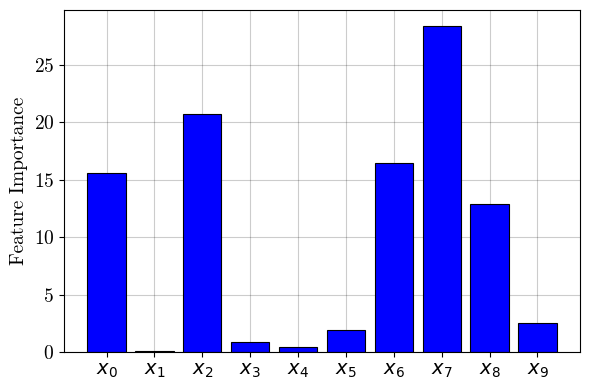

In [18]:
model = kriging_model
X = X_tr

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X, 
)

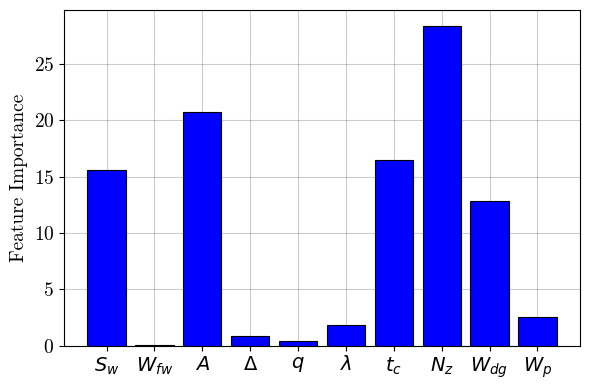

In [19]:
model = kriging_model
X = X_tr
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X, 
    feature_names=feature_names
)

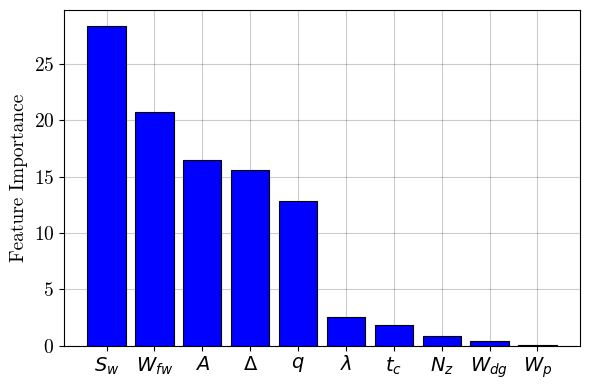

In [20]:
model = kriging_model
X = X_tr
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
sorted = True

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X, 
    feature_names=feature_names,
    sorted=sorted
)